In [139]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
#data load
df = pd.read_csv("Customer curn prediction/_telco_customer_churn.csv")

# Clean column names
df.columns = df.columns.str.strip()

print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

Shape: (7043, 22)
Columns: ['Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Value', 'Churn Score', 'CLTV']


In [141]:
#Fix TotalCharges (Very Important for Telco Dataset)
if "TotalCharges" in df.columns:
    df["TotalCharges"] = df["TotalCharges"].replace(" ", np.nan)
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
    df["TotalCharges"].fillna(df["TotalCharges"].median(), inplace=True)

In [142]:
#Clean Target Column FIRST (Before Anything Else)
# Identify churn column automatically
target_column = [col for col in df.columns if "churn" in col.lower()][0]

# Clean values
df[target_column] = df[target_column].astype(str).str.strip().str.lower()

# Convert to binary
df[target_column] = df[target_column].replace({"yes": 1, "no": 0})

# Drop any remaining NaN in target
df = df.dropna(subset=[target_column])

print("Unique target values:", df[target_column].unique())
print("NaN in target:", df[target_column].isnull().sum())

Unique target values: <StringArray>
['1', '0']
Length: 2, dtype: str
NaN in target: 0


In [143]:
#Remove ID Column (If Exists)
id_cols = [col for col in df.columns if "id" in col.lower()]
df = df.drop(columns=id_cols)

print("After removing ID:", df.shape)

After removing ID: (7043, 22)


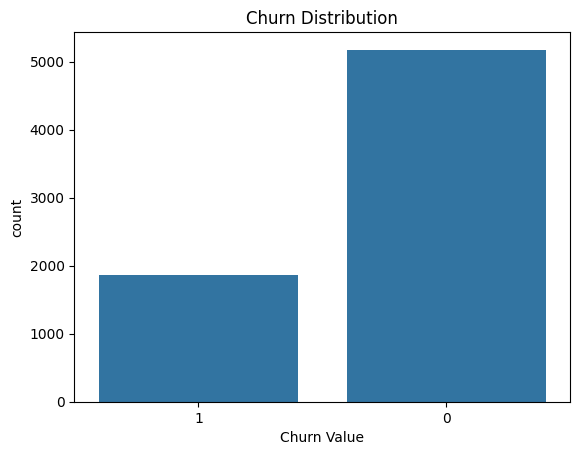

In [144]:
#EDA (Your Required 4 Topics)
#Target Distribution
sns.countplot(x=target_column, data=df)
plt.title("Churn Distribution")
plt.show()

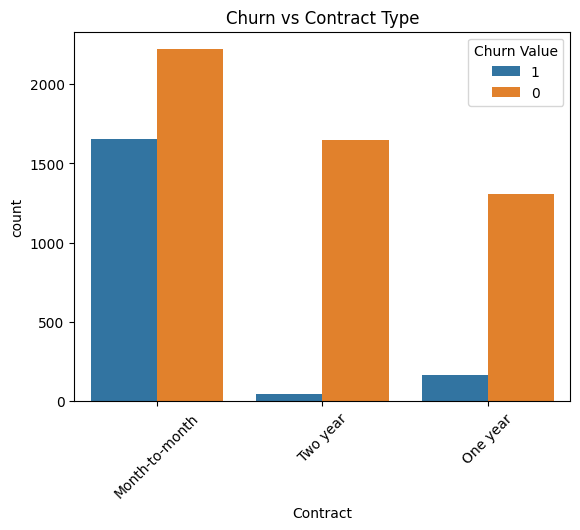

In [145]:
#Churn vs Contract
contract_col = [col for col in df.columns if "contract" in col.lower()][0]

sns.countplot(x=contract_col, hue=target_column, data=df)
plt.xticks(rotation=45)
plt.title("Churn vs Contract Type")
plt.show()

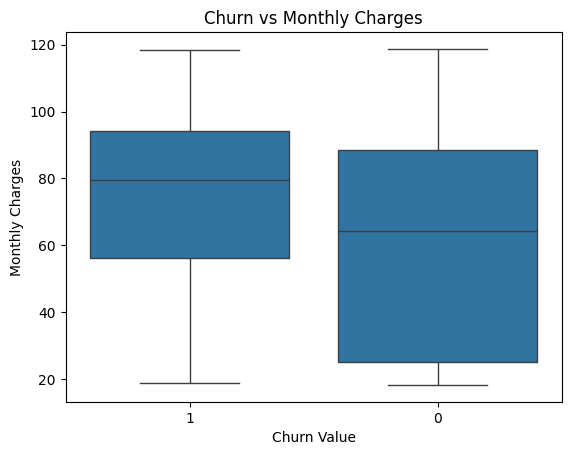

In [146]:
#churn vs monthly charges 
monthly_col = [col for col in df.columns if "monthly" in col.lower()][0]

sns.boxplot(x=target_column, y=monthly_col, data=df)
plt.title("Churn vs Monthly Charges")
plt.show()

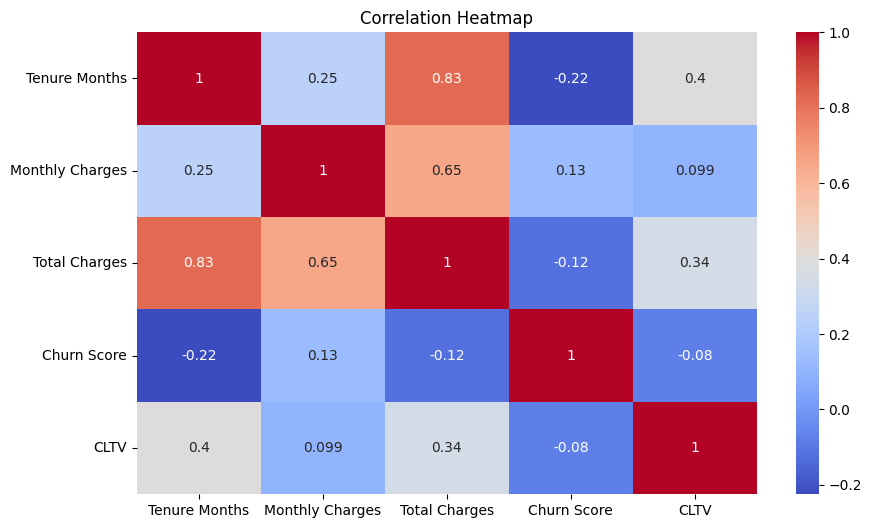

In [147]:
#correalation heatmap
numeric_cols = df.select_dtypes(include=["int64","float64"]).columns

plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [148]:
#Encode Categorical Columns (EXCLUDING TARGET)
categorical_cols = df.select_dtypes(include=["object","string"]).columns

df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("After encoding:", df.shape)

After encoding: (7043, 33)


In [158]:
#STEP 2 — Load Data
import pandas as pd
import numpy as np

df = pd.read_csv("Customer curn prediction/_telco_customer_churn.csv")
df.columns = df.columns.str.strip()

print(df.shape)

(7043, 22)


In [159]:
#STEP 3 — Define Target Properly
target_column = "Churn Value"

print(df[target_column].unique())

[1 0]


In [160]:
#STEP 4 — Separate X and y (BEFORE Encoding)
X = df.drop(columns=[target_column])
y = df[target_column]

print("Target NaN:", y.isnull().sum())

Target NaN: 0


In [161]:
#STEP 5 — Encode Only X
X = pd.get_dummies(X, drop_first=True)

print("Shape after encoding:", X.shape)

Shape after encoding: (7043, 32)


In [162]:
#STEP 6 — Train Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [163]:
#STEP 7 — Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [164]:
#STEP 8 — Train Model
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [165]:
#STEP 9 — Evaluate
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9063165365507452
[[942  67]
 [ 65 335]]
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1009
           1       0.83      0.84      0.84       400

    accuracy                           0.91      1409
   macro avg       0.88      0.89      0.88      1409
weighted avg       0.91      0.91      0.91      1409

